## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## DATA CLEANING

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
# Load CSV into a DataFrame
df = pd.read_csv('data/kc_house_data.csv')

# Show the info of the DataFrame
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [37]:
# Checking the first 10 rows of the data

print(df.head(10))


           id        date      price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014   221900.0         3       1.00         1180  \
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors waterfront  view  ...          grade sqft_above   
0      5650     1.0        NaN  NONE  ...      7 Average       1180  \
1      7242     2.0         NO  NONE  ...  

In [38]:
# Checking the last 5 rows of the data

print(df.tail())

               id        date     price  bedrooms  bathrooms  sqft_living   
21592   263000018   5/21/2014  360000.0         3       2.50         1530  \
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...      grade sqft_above   
21592      1131     3.0         NO  NONE  ...     8 Good       1530  \
21593      5813     2.0         NO  NONE  ...     8 Good       2310   
21594      1350     2.0         NO  NONE  ...  7 Average       1020   
21595      2388     2.0        NaN  NONE  ...     8 Good       1600   
21596      1076     2.0         NO  NONE  ...  7 Average       1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long   
21592            0.0      2009     

In [8]:
# Checking if there are missing values in the dataframe

missing_values = df.isnull().values.any()
print(f"Are there any missing values in the DataFrame? {missing_values}")

Are there any missing values in the DataFrame? True


In [42]:
# Counting the number of missing values in each column

missing_values_count = df.isnull().sum().sort_values(ascending=False)
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
yr_renovated     3842
waterfront       2376
sqft_basement     454
view               63
id                  0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
condition           0
grade               0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
sqft_lot15          0
dtype: int64


In [44]:
# Counting the number of missing values in specific columns

missing_values_in_column = df['sqft_basement'].isnull().sum()
print(f"Number of missing values in 'sqft_basement': {missing_values_in_column}")

Number of missing values in 'sqft_basement': 454


In [59]:
# Handling missing values 

# List of columns with missing values
columns_with_missing_values = ['yr_renovated', 'waterfront', 'sqft_basement', 'view']

# Create indicator variables for columns with missing values
for col in columns_with_missing_values:
    indicator_col_name = f'{col}_missing'
    df[indicator_col_name] = df[col].isnull().astype(int)


# Filling NaNs with zeros for numerical columns and 'Unknown' for categorical ones
df['yr_renovated'].fillna(0, inplace=True)
df['waterfront'].fillna('Unknown', inplace=True)
df['sqft_basement'].fillna(0, inplace=True)  # Assuming sqft_basement was converted to numeric
df['view'].fillna('Unknown', inplace=True)

# Display the modified DataFrame to check for indicator columns
print(df.head())

           id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00         1180  \
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... yr_renovated zipcode      lat   
0      5650     1.0         NO  NONE  ...          0.0   98178  47.5112  \
1      7242     2.0         NO  NONE  ...       1991.0   98125  47.7210   
2     10000     1.0         NO  NONE  ...          0.0   98028  47.7379   
3      5000     1.0         NO  NONE  ...          0.0   98136  47.5208   
4      8080     1.0         NO  NONE  ...          0.0   98074  47.6168   

      long  sqft_living15  sqft_lot15  yr_renovated_missing   
0 -122.257           1340        5650          

In [48]:
# Checking whether the applied changes have been made to the columns with missing values

print("Before:")
print(df['waterfront'].head())

print("After:")
print(df['waterfront'].head())

print("Before:")
print(df['yr_renovated'].head())

print("After:")
print(df['yr_renovated'].head())

print("Before:")
print(df['sqft_basement'].head())

print("After:")
print(df['sqft_basement'].head())

Before:
0    NO
1    NO
2    NO
3    NO
4    NO
Name: waterfront, dtype: object
After:
0    NO
1    NO
2    NO
3    NO
4    NO
Name: waterfront, dtype: object
Before:
0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64
After:
0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64
Before:
0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64
After:
0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64


In [28]:
# Checking for presence of duplicate rows

duplicate_rows = df.duplicated()
print(duplicate_rows)

# Removing duplicate rows

df.drop_duplicates(inplace=True)
print("DataFrame after removing all duplicate rows:")
print(df)


0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool
DataFrame after removing all duplicate rows:
               id        date     price  bedrooms  bathrooms  sqft_living   
0      7129300520  10/13/2014  221900.0         3       1.00         1180  \
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1

In [32]:
# Changing the sqft_basement column to datatype 'float'
# Replace '?' with np.NaN
df['sqft_basement'].replace('?', np.NaN, inplace=True)

# Convert to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

# Check whether the datatype is now 'float'
print(df['sqft_basement'])

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64


## EXPLORATORY DATA ANALYSIS

In [33]:
# Checking statistical details for numerical columns.
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living   
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000  \
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built   
count  2.159700e+04  21597.000000  21597.000000   21143.000000  21597.000000  \
mean   1.509941e+04      1.494096   1788.596842     291.851724   1970.999676   
std    4.141264e+04      0.539683    827.759761 

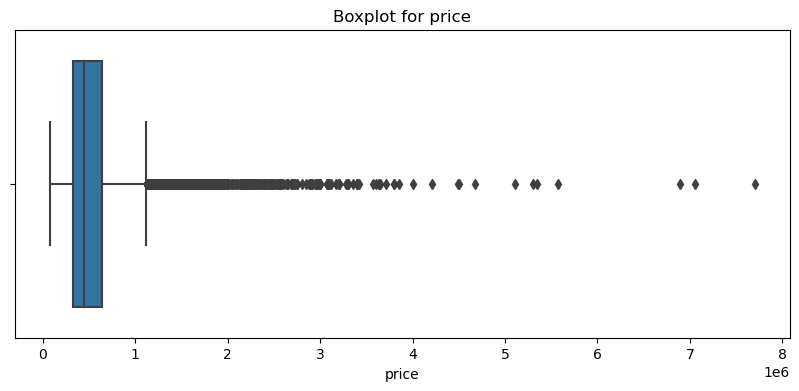

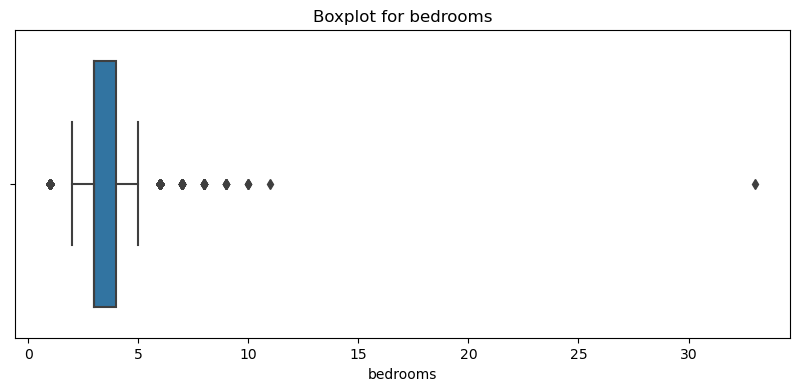

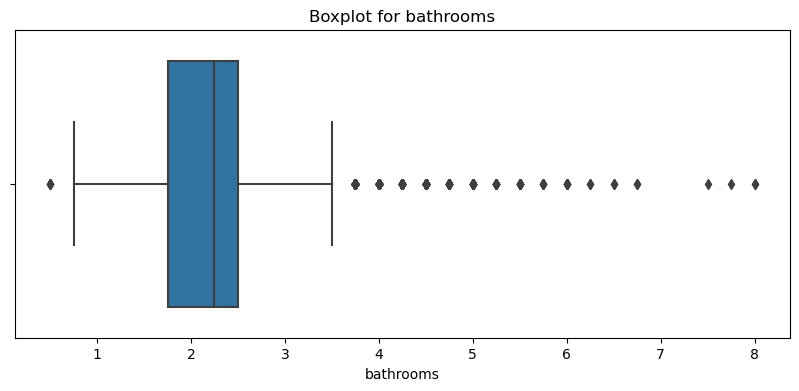

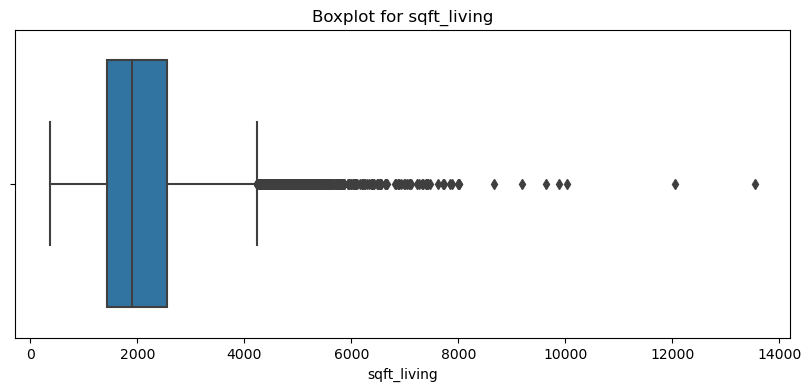

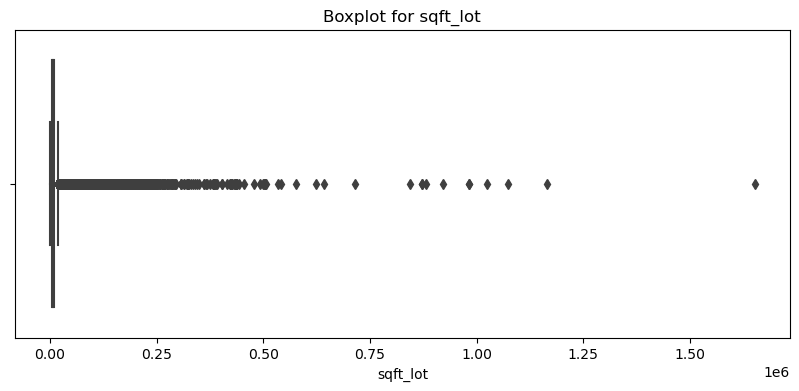

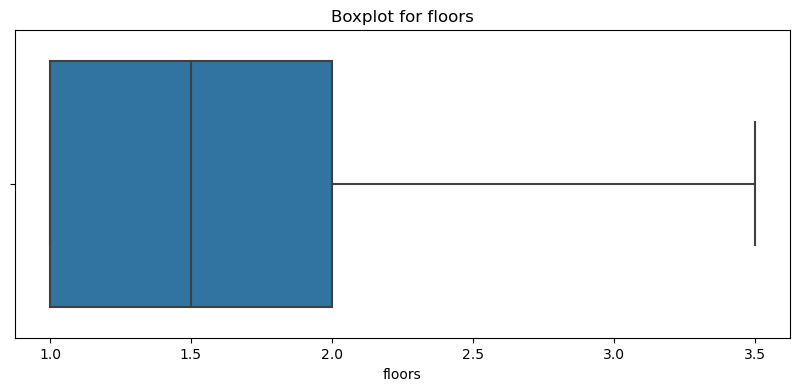

Skipped waterfront because it is not numeric.
Skipped view because it is not numeric.
Skipped condition because it is not numeric.
Skipped grade because it is not numeric.


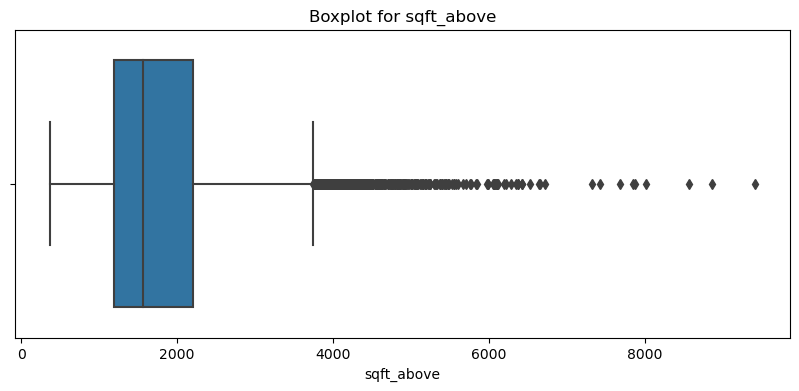

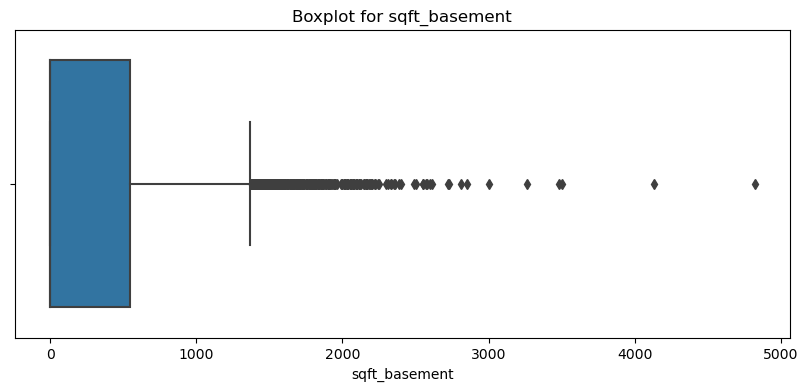

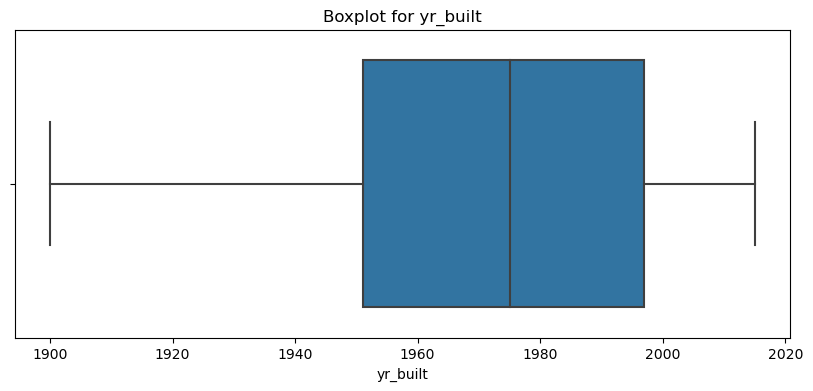

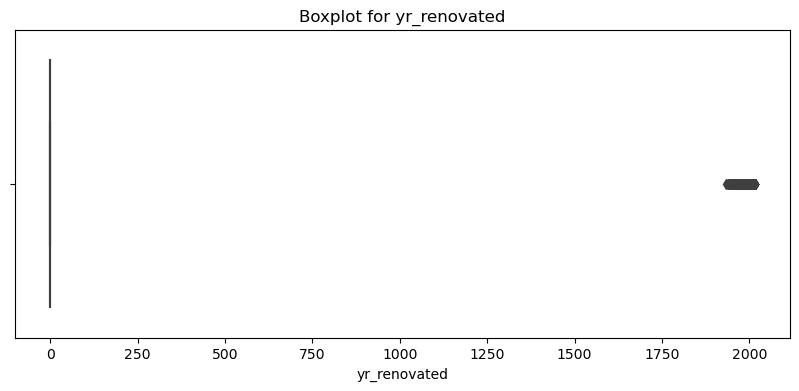

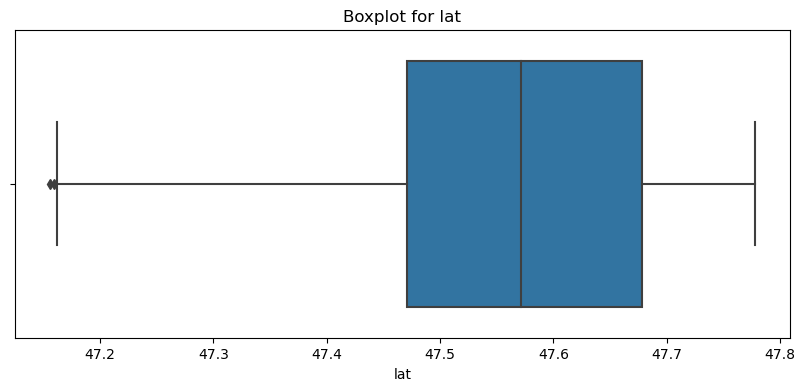

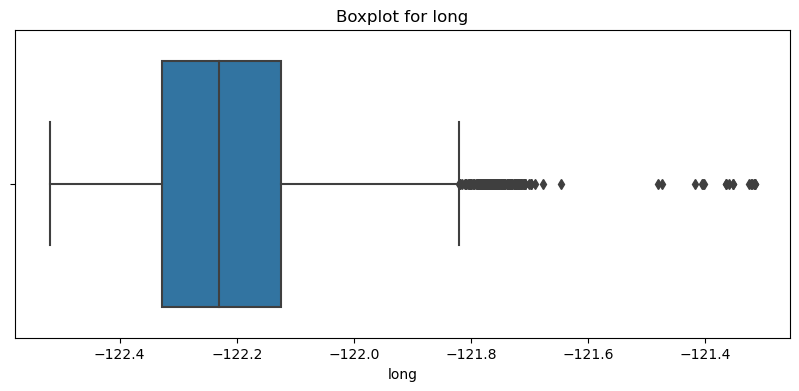

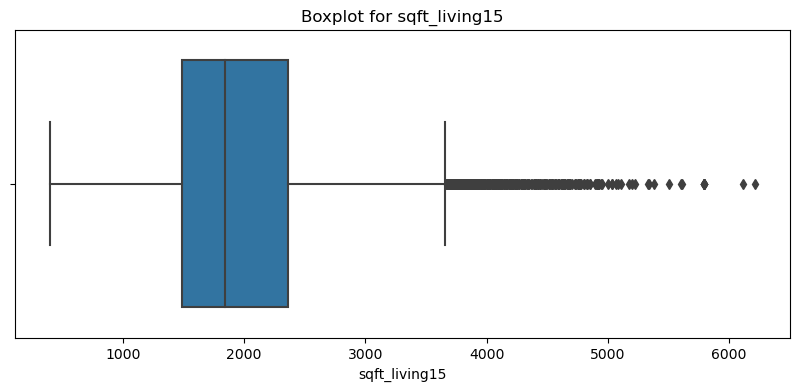

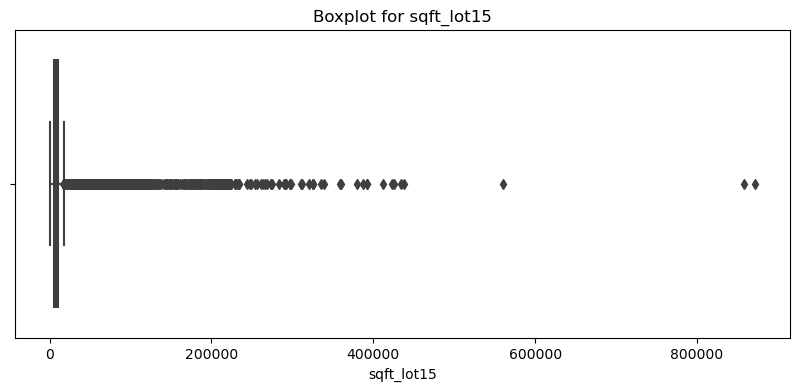

In [51]:
# Checking for outliers 

for col in cols_to_check:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot for {col}")
        plt.show()
    else:
        print(f"Skipped {col} because it is not numeric.")

In [52]:
# Checking for outliers using the Interquatile Range
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers for {col} are {outliers}")

Outliers for id are Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]
Outliers for price are                id        date      price  bedrooms  bathrooms  sqft_living   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420  \
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
49      822039084   3/11/2015  1350000.0         3       2.50         2753   
69     1802000060   6/12/2014  1330000.0         5       2.25         3200   
125    4389200955    3/2/2015  1450000.0         4       2.75         2750   
...           ...         ...        ...       ...        ...          ...   
21552   524059330   1/30/2015  1700000.0         4       3.50         3830   
21560  9253900271    1/7/2015  3570000.0         5       4.50         4

In [60]:
# Replace outliers in the "price" column because the prices might be very high depending on the independent variables e.g. bedrooms
if pd.api.types.is_numeric_dtype(df['price']):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
    df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

In [61]:
# Remove the outliers in other columns except the "price" column
# Define columns to check, excluding the "price" column
cols_to_check = [col for col in df.columns if col != 'price' and pd.api.types.is_numeric_dtype(df[col])]

# Remove outliers in other columns
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [62]:
# Display the first 5 rows of the now cleaned data
print(df.head())

           id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00         1180  \
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   

   sqft_lot  floors waterfront  view  ... yr_renovated zipcode      lat   
0      5650     1.0         NO  NONE  ...          0.0   98178  47.5112  \
2     10000     1.0         NO  NONE  ...          0.0   98028  47.7379   
3      5000     1.0         NO  NONE  ...          0.0   98136  47.5208   
4      8080     1.0         NO  NONE  ...          0.0   98074  47.6168   
6      6819     2.0         NO  NONE  ...          0.0   98003  47.3097   

      long  sqft_living15  sqft_lot15  yr_renovated_missing   
0 -122.257           1340        5650          